## Importing Libraries

In [139]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)
from feature_engine.encoding import (
    OrdinalEncoder,
)


## Importing the Dataset

In [140]:
df = pd.read_csv("data.csv")
df

,Gender,Age,Study_year,Living,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
2,Male,23,2.0,Home,Yes,No,No,No,No,No,No,NaN,180.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
101,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0
102,Male,22,3.0,Hostel,No,Yes,Car,NaN,Yes,Yes,No,No,150.0
103,Female,21,2.0,Home,Yes,No,No,No,No,Yes,No,Yes,200.0


Splitting the Dataset into Train and Test

In [141]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Monthly_expenses_$'], axis=1), df['Monthly_expenses_$'], test_size = 0.1, random_state = 0)
y_train = y_train.to_frame(name='Monthly_expenses')
y_test = y_test.to_frame(name='Monthly_expenses')

In [158]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
print(vars_with_na)

['Study_year', 'Living', 'Part_time_job', 'Transporting', 'Smoking', 'Drinks', 'Cosmetics_&_Self-care', 'Monthly_Subscription', 'Monthly_expenses_$']


### Categorical Variables

In [143]:
# Filtering the categorical features from all the features

cat_vars = [var for var in df.columns if df[var].dtype == 'O']

#Filtering categorical features with na values


cat_vars_with_na = [
    var for var in cat_vars
    if X_train[var].isnull().sum() > 0
]

print(cat_vars_with_na)
#Returning categorical variables with na in descending order
X_train[cat_vars_with_na ].isnull().mean().sort_values(ascending=False)


['Living', 'Part_time_job', 'Transporting', 'Smoking', 'Drinks', 'Cosmetics_&_Self-care', 'Monthly_Subscription']


Transporting             0.127660
Drinks                   0.127660
Cosmetics_&_Self-care    0.127660
Smoking                  0.095745
Monthly_Subscription     0.063830
Part_time_job            0.042553
Living                   0.021277
dtype: float64

In [144]:
# replace missing values with most frequent category

# set up the class
cat_imputer_frequent = CategoricalImputer(
    imputation_method='frequent', variables=cat_vars_with_na)

# fit the class to the train set
cat_imputer_frequent.fit(X_train)

# the class learns and stores the parameters
cat_imputer_frequent.imputer_dict_

{'Living': 'Home',
 'Part_time_job': 'No',
 'Transporting': 'Car',
 'Smoking': 'No',
 'Drinks': 'No',
 'Cosmetics_&_Self-care': 'Yes',
 'Monthly_Subscription': 'No'}

In [145]:
# replace NA by missing

X_train = cat_imputer_frequent.transform(X_train)
X_test = cat_imputer_frequent.transform(X_test)

In [146]:
#checking for any remaining na values

X_train[cat_vars_with_na ].isnull().mean().sort_values(ascending=False)

Living                   0.0
Part_time_job            0.0
Transporting             0.0
Smoking                  0.0
Drinks                   0.0
Cosmetics_&_Self-care    0.0
Monthly_Subscription     0.0
dtype: float64

## Numerical Variables

In [147]:
# Collecting numerical variables in list

num_vars = [var for var in X_train.columns if var not in cat_vars]
num_vars


['Age', 'Study_year']

In [148]:
# make a list with the numerical variables that contain missing values

vars_with_na = [
    var for var in num_vars
    if X_train[var].isnull().sum() > 0
]

print(vars_with_na)
# print percentage of missing values per variable in descending order

X_train[vars_with_na].isnull().mean()

['Study_year']


Study_year    0.031915
dtype: float64

In [149]:
# add missing indicator i.e. a new column which 

missing_ind = AddMissingIndicator(variables=vars_with_na)

missing_ind.fit(X_train)

X_train = missing_ind.transform(X_train)
X_test = missing_ind.transform(X_test)

# check the binary missing indicator variables
X_train[['Study_year_na']].sample(5)

,Study_year_na
88,0
78,0
72,0
75,0
37,1


In [150]:
# then replace missing data with the mean

# set the imputer
mean_imputer = MeanMedianImputer(
    imputation_method='mean', variables=(vars_with_na))

# learn and store parameters from train set
mean_imputer.fit(X_train)

# the stored parameters
mean_imputer.imputer_dict_

{'Study_year': 2.6043956043956045}

In [151]:
#imputing mean for target feature
mean_imputer_target = MeanMedianImputer(
    imputation_method='mean', variables=['Monthly_expenses'])

mean_imputer_target.fit(y_train)

mean_imputer_target.imputer_dict_

{'Monthly_expenses': 211.02272727272728}

In [152]:
X_train = mean_imputer.transform(X_train)
X_test = mean_imputer.transform(X_test)
y_train = mean_imputer_target.transform(y_train)
y_test = mean_imputer_target.transform(y_test)

# check that we have no more missing values in the engineered variables
print(X_train[vars_with_na].isnull().sum())
print(X_test[vars_with_na].isnull().sum())
print(y_test.isnull().sum())
print(y_train.isnull().sum())

Study_year    0
dtype: int64
Study_year    0
dtype: int64
Monthly_expenses    0
dtype: int64
Monthly_expenses    0
dtype: int64


In [153]:
#Checking for any remaining na_values

vars_with_na_in_X_train = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]
vars_with_na_in_X_test = [var for var in X_test.columns if X_test[var].isnull().sum() > 0]
vars_with_na_in_y_train = [var for var in y_train.columns if y_train[var].isnull().sum() > 0]
vars_with_na_in_y_test = [var for var in y_test.columns if y_test[var].isnull().sum() > 0]
print(vars_with_na_in_X_test)
print(vars_with_na_in_X_train)
print(vars_with_na_in_y_test)
print(vars_with_na_in_y_train)

[]
[]
[]
[]


## Encoding categorical Variables

In [159]:
print(cat_vars)

['Gender', 'Living', 'Scholarship', 'Part_time_job', 'Transporting', 'Smoking', 'Drinks', 'Games_&_Hobbies', 'Cosmetics_&_Self-care', 'Monthly_Subscription']


In [155]:
# set up the encoder
cat_encoder = OrdinalEncoder(encoding_method='ordered', variables=cat_vars)

# create the mappings
cat_encoder.fit(X_train, y_train)

# mappings are stored and class can be saved
cat_encoder.encoder_dict_

d:\digimantra_hackathon\spend-savvy-ml\myenv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Gender': {'Female ': 0, 'Male ': 1},
 'Living': {'Hostel': 0, 'Home': 1},
 'Scholarship': {'No': 0, 'Yes': 1},
 'Part_time_job': {'No': 0, 'Yes': 1},
 'Transporting': {'No': 0, 'Motorcycle': 1, 'Car': 2},
 'Smoking': {'No': 0, 'Yes': 1},
 'Drinks': {'Yes': 0, 'No': 1},
 'Games_&_Hobbies': {'Yes': 0, 'No': 1},
 'Cosmetics_&_Self-care': {'No': 0, 'Yes': 1},
 'Monthly_Subscription': {'No': 0, 'Yes': 1}}

In [156]:
#Transforming X_train and X-test

X_train = cat_encoder.transform(X_train)
X_test = cat_encoder.transform(X_test)

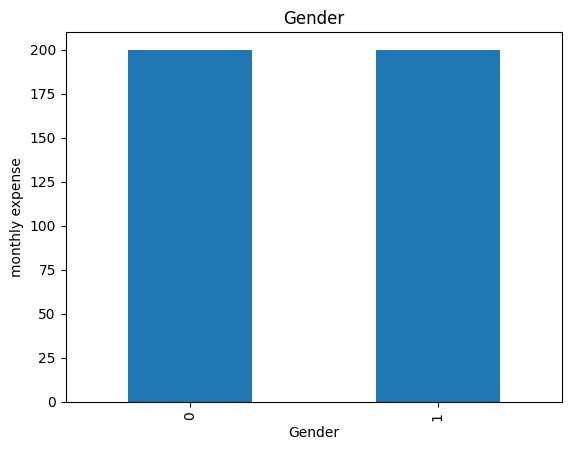

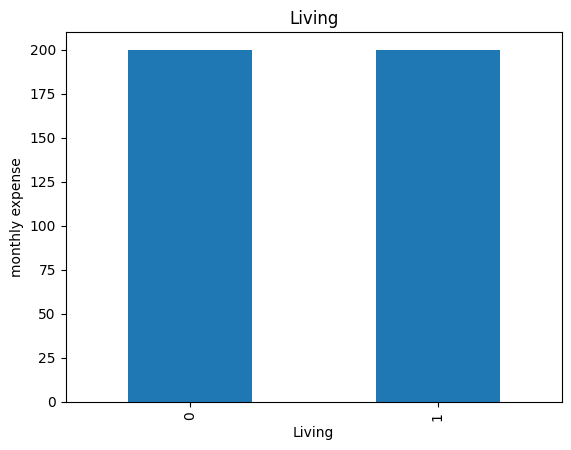

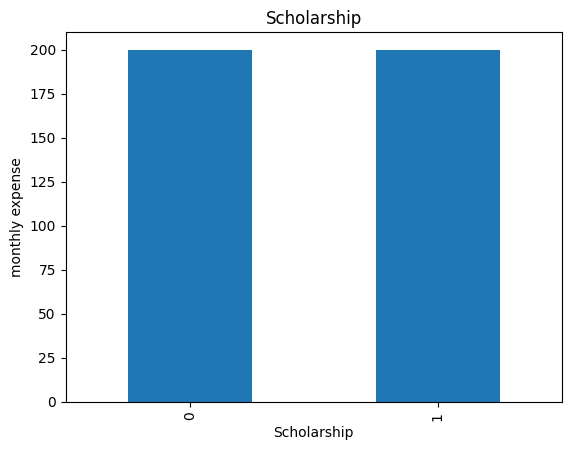

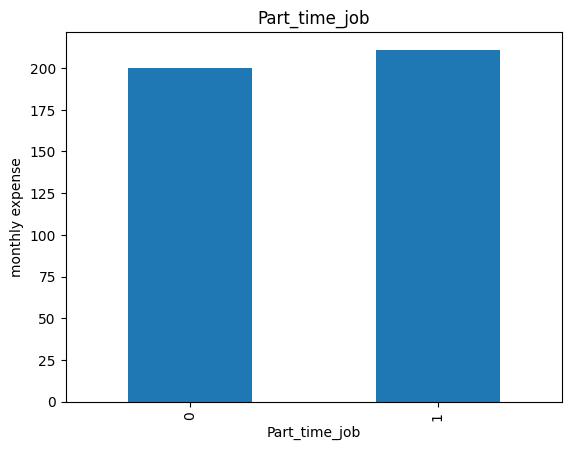

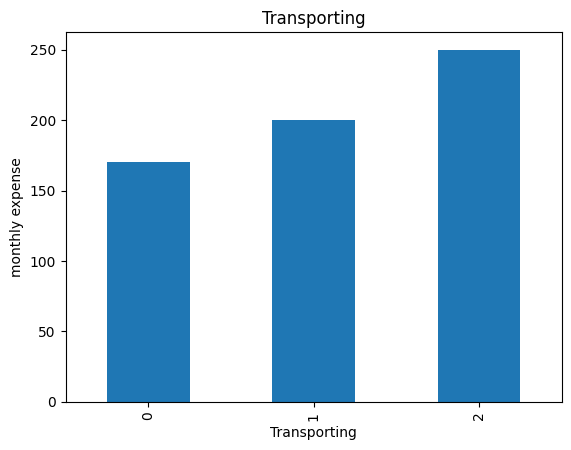

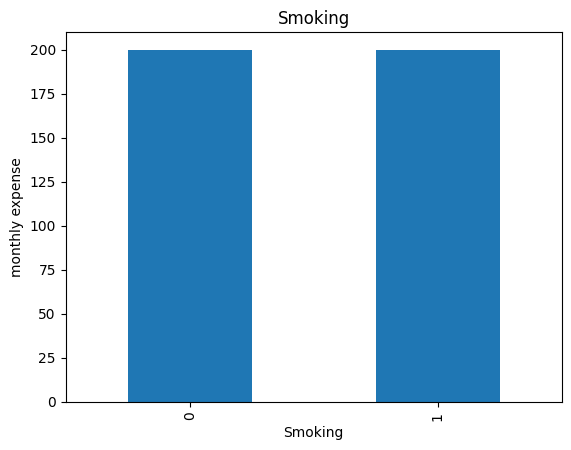

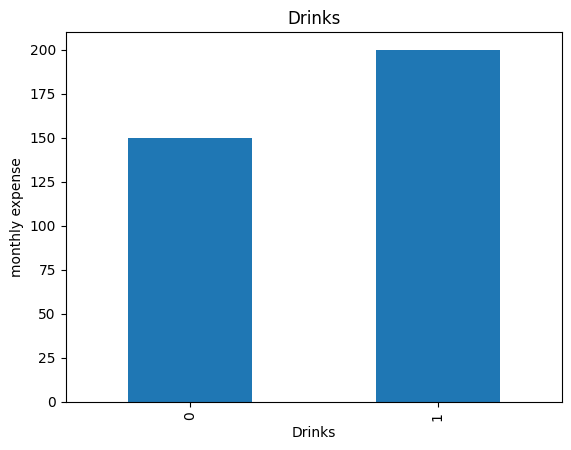

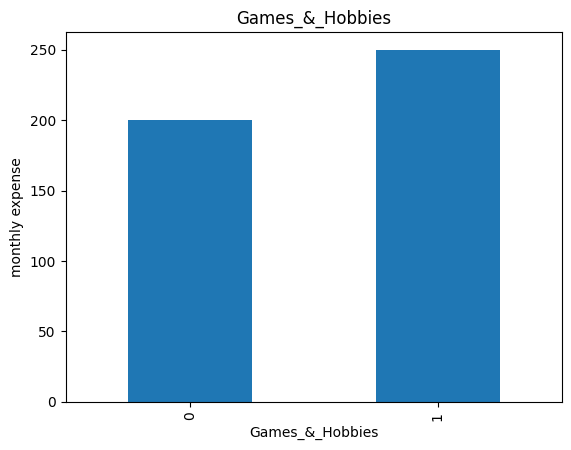

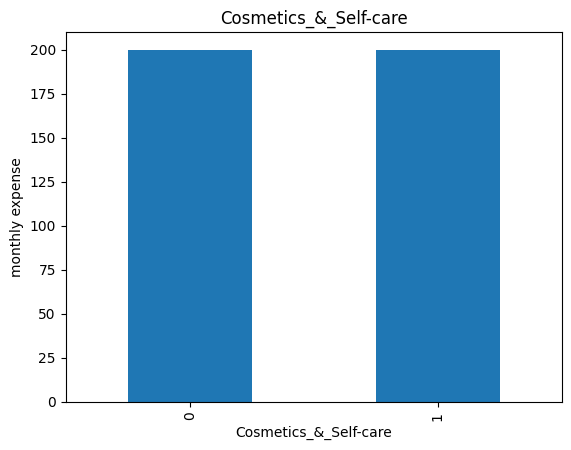

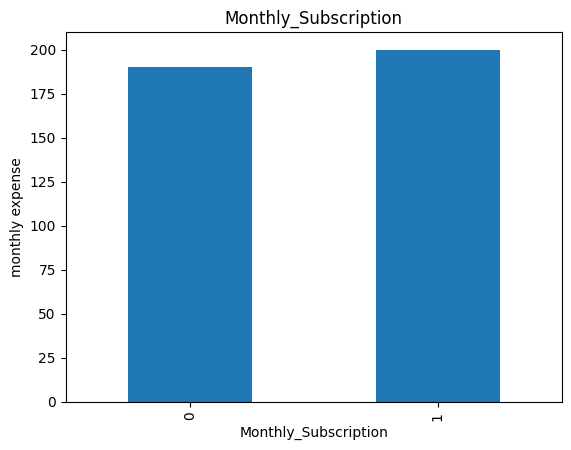

In [157]:
#Visualising the encoded features by comparing them to Monthly Expense
    
for var in cat_vars:
    tmp = pd.concat([X_train, y_train], axis=1)
    tmp.groupby(var)['Monthly_expenses'].median().plot.bar()
    plt.title(var)
    plt.ylabel('monthly expense')
    plt.show()
    